In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, r2_score
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
df.dropna(inplace=True)
df.shape

(4909, 12)

In [8]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
duplicates=df.duplicated().sum()
print(duplicates)
df.drop_duplicates(inplace=True)
duplicates=df.duplicated().sum()
print(duplicates)
df.shape

0
0


(4909, 12)

stroke
0    4700
1     209
Name: count, dtype: int64


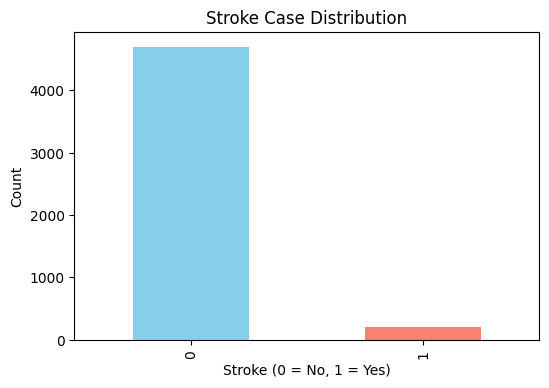

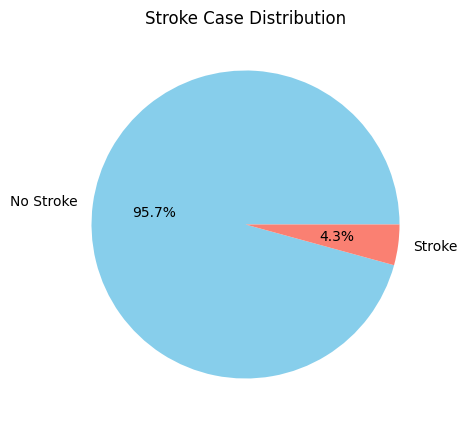

In [33]:
import matplotlib.pyplot as plt

print(df["stroke"].value_counts())

plt.figure(figsize=(6,4))
df["stroke"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Stroke Case Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,5))
df["stroke"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=["No Stroke","Stroke"], colors=["skyblue","salmon"])
plt.title("Stroke Case Distribution")
plt.ylabel("")
plt.show()


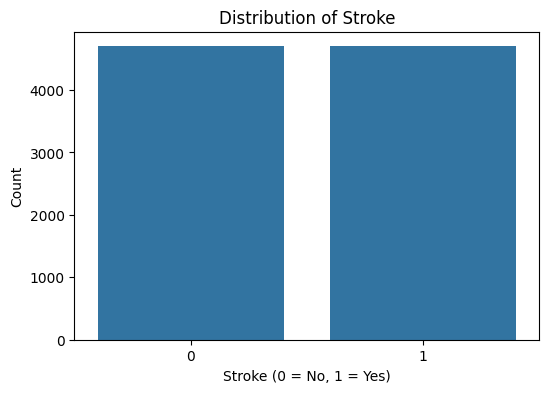

In [30]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df = df.dropna()

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_encoded = pd.get_dummies(X, drop_first=True)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns),
                          pd.DataFrame(y_resampled, columns=["stroke"])], axis=1)

df_resampled.to_csv("healthcare-dataset-stroke-data-encoded-balanced.csv", index=False)


plt.figure(figsize=(6,4))
sns.countplot(data=df_resampled, x='stroke')
plt.title("Distribution of Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()




(9400, 18)


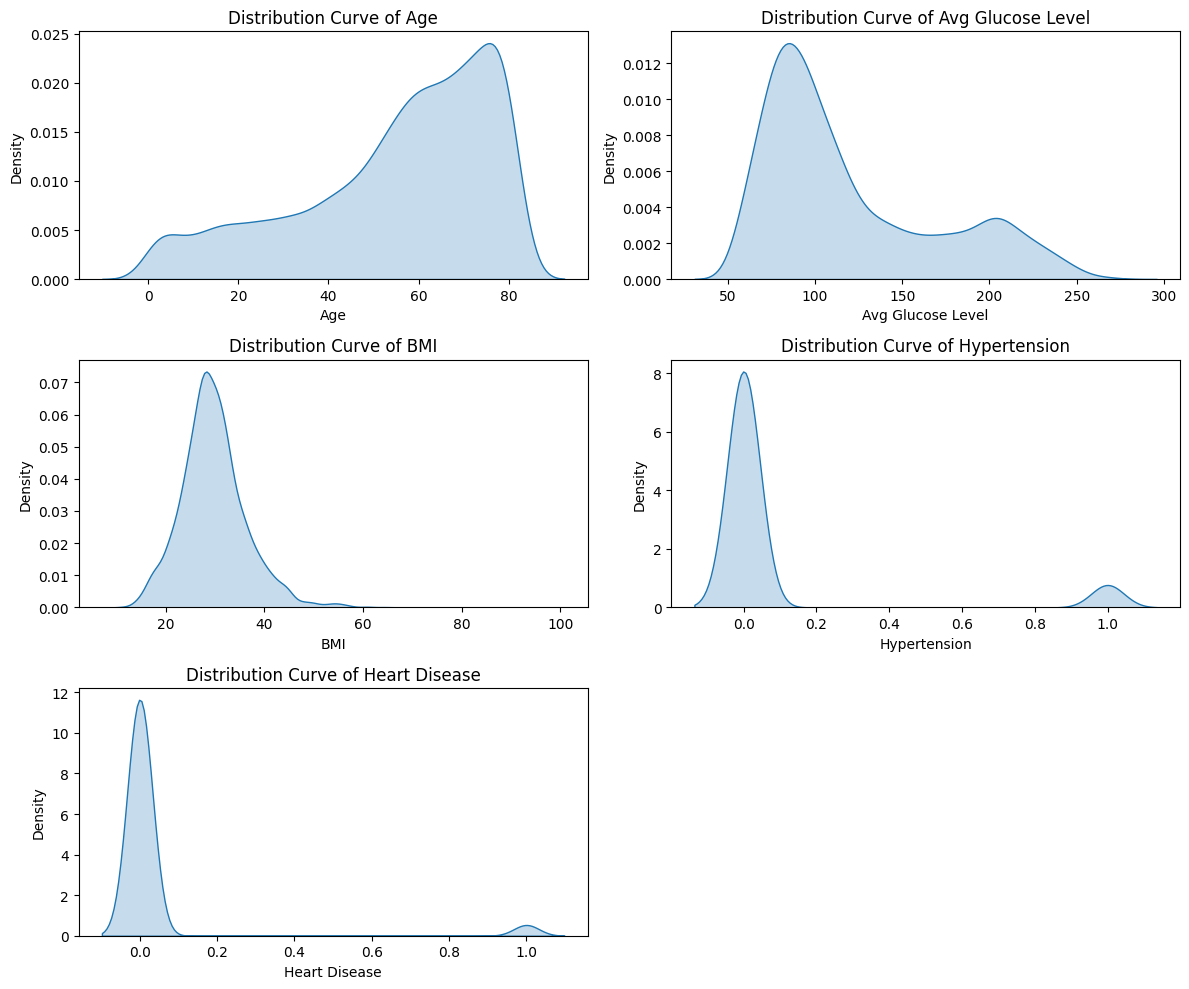

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_resampled = pd.read_csv("healthcare-dataset-stroke-data-encoded-balanced.csv")
print(df_resampled.shape)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
sns.kdeplot(df_resampled["age"], fill=True)
plt.title("Distribution Curve of Age")
plt.xlabel("Age")
plt.ylabel("Density")

plt.subplot(3, 2, 2)
sns.kdeplot(df_resampled["avg_glucose_level"], fill=True)
plt.title("Distribution Curve of Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Density")

plt.subplot(3, 2, 3)
sns.kdeplot(df_resampled["bmi"], fill=True)
plt.title("Distribution Curve of BMI")
plt.xlabel("BMI")
plt.ylabel("Density")

plt.subplot(3, 2, 4)
sns.kdeplot(df_resampled["hypertension"], fill=True)
plt.title("Distribution Curve of Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Density")

plt.subplot(3, 2, 5)
sns.kdeplot(df_resampled["heart_disease"], fill=True)
plt.title("Distribution Curve of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


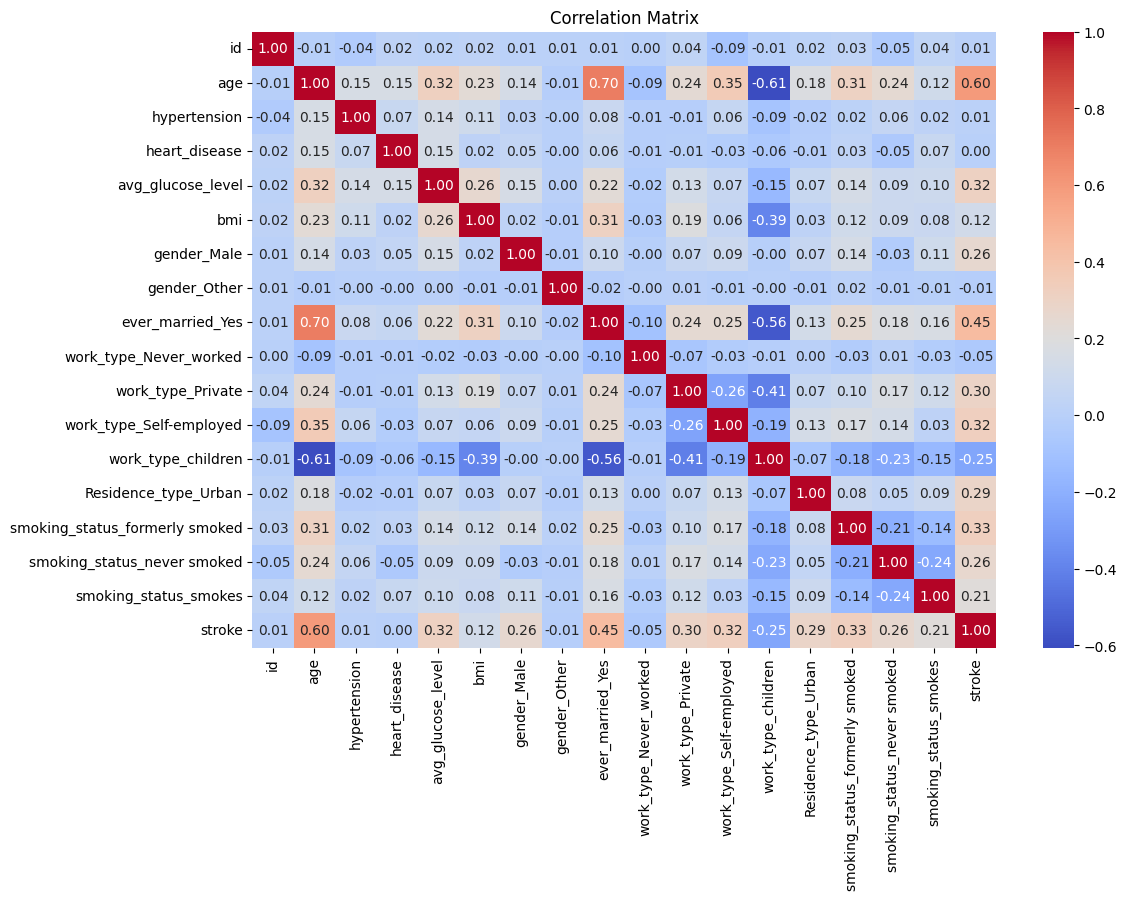

In [14]:
corr = df_resampled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
X = df_resampled.drop("stroke", axis=1)
y = df_resampled["stroke"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
dfs = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

dfs.to_csv("healthcare-stroke-scaled.csv", index=False)

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("healthcare-dataset-stroke-data-encoded-balanced.csv")

X = df.select_dtypes(include=[np.number])

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

X_filtered = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

X_filtered.to_csv("healthcare-dataset-stroke-data-filtered.csv", index=False)


In [17]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data-encoded-balanced.csv")

df = df.replace({True: 1, False: 0})

df = df.astype(int)

df.to_csv("converted_data.csv", index=False)



C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_37532\4005863592.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


Model: Decision Tree
Accuracy: 0.9239
Precision: 0.9145
Recall: 0.9384
F1: 0.9263
ROC-AUC: 0.9237

Model: Random Forest
Accuracy: 0.9580
Precision: 0.9621
Recall: 0.9551
F1: 0.9586
ROC-AUC: 0.9932

Model: Logistic Regression
Accuracy: 0.8840
Precision: 0.8936
Recall: 0.8768
F1: 0.8851
ROC-AUC: 0.9548

Model: XGBoost
Accuracy: 0.9638
Precision: 0.9665
Recall: 0.9624
F1: 0.9644
ROC-AUC: 0.9938

Best model based on Accuracy: XGBoost


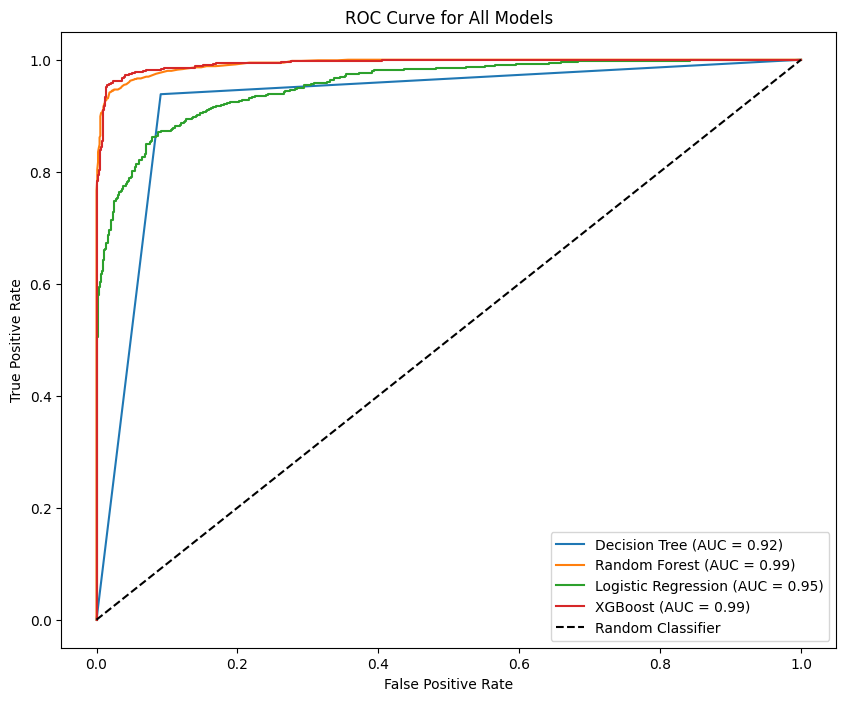

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("converted_data.csv")

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs'),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

metrics = {}
roc_curves = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC-AUC": roc_auc
    }
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[model_name] = (fpr, tpr)

for model_name, model_metrics in metrics.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()

best_model_name = max(metrics, key=lambda model_name: metrics[model_name]["Accuracy"])
print(f"Best model based on Accuracy: {best_model_name}")

plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics[model_name]["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validation Score: 0.9930
Accuracy: 0.9686
Precision: 0.9668
Recall: 0.9718
F1: 0.9693
ROC-AUC: 0.9949


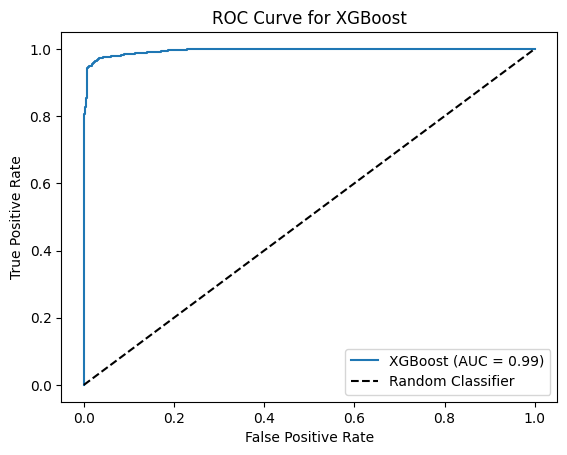

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

df = pd.read_csv("converted_data.csv")

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Score: {best_score:.4f}")

y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validation Score: 0.9930
Accuracy: 0.9686
Precision: 0.9668
Recall: 0.9718
F1: 0.9693
ROC-AUC: 0.9949


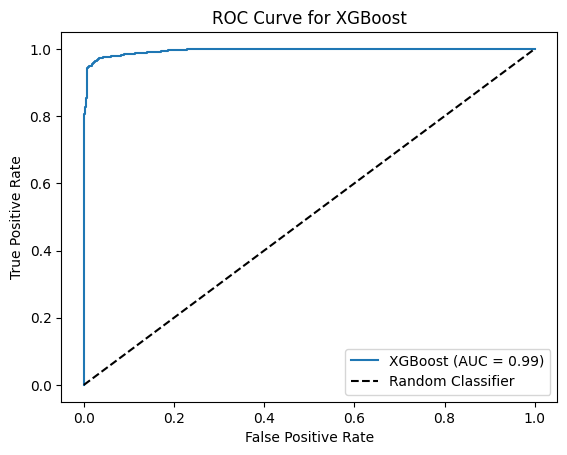

Model saved as best_model.pkl


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle

df = pd.read_csv("converted_data.csv")

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Score: {best_score:.4f}")

y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as best_model.pkl")
